In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [9]:
iris = pd.read_csv('data/iris.data', header=None, names=['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class'])

In [14]:
np.std(iris['sepal_l'].values)/np.sqrt(len(iris['sepal_l']))

0.067385568297780307

# Bootstrapping an estimator

Idea: when we have finite or limited data, use sub-sampling to "pretend" that we can draw more observations. Example, calculating an $\sigma_{\bar{x}}$ of 1000 data points, draw 200 of them randomly with replacement 50 times. For each one, calculate the $\bar{x}$ and then use these 50 $\bar{x}$'s for an empirical $\sigma_{\bar{x}}$.

In [17]:
# Boot-strapping an estimator
def meanconf95(data):
    num = int(len(data)/4)
    xbars = [ np.mean(np.random.choice(data, num, replace=True)) for _ in range(0,50)]
    return 1.96*np.std(xbars)

In [18]:
meanconf95(iris['sepal_l'].values)

0.25265831389300247

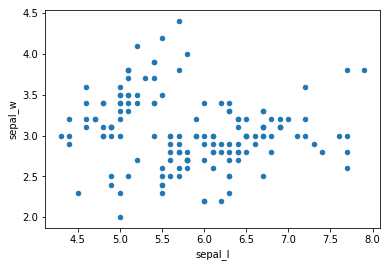

In [21]:
iris[['sepal_l', 'sepal_w']].plot.scatter(x='sepal_l', y='sepal_w')

In [22]:
X = iris['sepal_l'].values
Y = iris['sepal_w'].values

In [27]:
(X.std()**2, Y.std()**2)

(0.6811222222222223, 0.18675066666666668)

In [32]:
# this gives an nxn symmetric matrix (because cov is commutative) 
# where entry (i,j) is the covariance of the ith and jth random variable
np.cov(X,Y) 

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [34]:
correlation_coef = np.cov(X,Y)[0,1]/(X.std()*Y.std())
correlation_coef

-0.11010327176239869

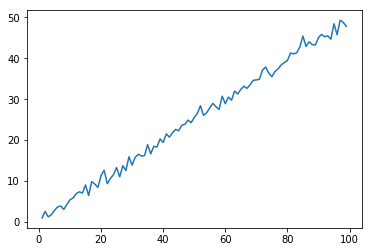

In [50]:
X = np.arange(1,100)
Y = 0.5*X + np.random.normal(0,1,len(X))
plt.plot(X,Y)

In [43]:
X.std()**2

816.66666666666674

In [51]:
correlation_coef = np.cov(X,Y)[0,1]/(X.std()*Y.std())
correlation_coef

1.00771792740462

In [49]:
Y = np.random.normal(0,1,100)

In [45]:
Y

array([ 0.06196944, -1.34959073,  1.43446616, -0.80386855,  0.82034946,
       -0.38121583,  0.62498779,  1.81714404,  2.66799338,  0.4480029 ,
       -0.70939082,  1.50725139, -1.33238475, -1.11121432, -1.9350818 ,
        0.046049  , -0.80510359,  0.12968984, -0.85598314, -1.49491762,
       -0.09523269, -1.33245527, -0.47106522,  0.90348639,  0.21437724,
       -1.87826938, -1.38094075,  0.13247288, -1.51290514,  2.81592879,
        0.63565281, -1.89352526, -1.06376489,  0.42727012, -0.37147028,
        0.19704659, -0.50594103,  0.42117407,  1.46421752,  0.61733177,
        1.14664628,  1.63862188, -0.45160324,  1.66497779, -0.36390314,
       -0.12568946,  0.41959744,  0.79282889,  0.19989116,  0.47709442,
        0.99816589,  0.67214032,  0.63237445,  0.63382376,  0.96379839,
       -0.83078537, -0.08028865,  1.73585121, -1.06023785, -0.3280905 ,
       -1.25741174, -1.97015684, -0.78948494,  0.99269941, -1.09071272,
        0.0812688 , -1.55680015, -0.06753876, -0.23919904,  1.37